In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
x = np.linspace(0,4,20)
y = x**2 #Creats y = X^2 

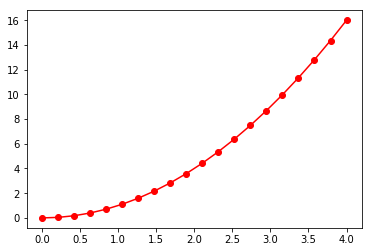

In [7]:
plt.plot(x,y, marker = 'o', linestyle = None, color = 'r')

In [12]:
import pandas as pd
# Feature Scaling
data_dict = {'x':x/4, 'x^2':y/16, 'results':y/16}
data = pd.DataFrame(data_dict)
print(data.head(5))

          x       x^2   results
0  0.000000  0.000000  0.000000
1  0.052632  0.002770  0.002770
2  0.105263  0.011080  0.011080
3  0.157895  0.024931  0.024931
4  0.210526  0.044321  0.044321


In [13]:
print(data.tail(5)) # Hence, we have our data frame is ready

           x       x^2   results
15  0.789474  0.623269  0.623269
16  0.842105  0.709141  0.709141
17  0.894737  0.800554  0.800554
18  0.947368  0.897507  0.897507
19  1.000000  1.000000  1.000000


In [17]:
def Multivar_Gradient_Descent(x, y, lt, iterations, plot_on):
    x = x.values
    a = []
    t = x.shape[0]
    for i in range(t):
        a.append(1)
    b = np.array(a).reshape((t,1))
    x = np.concatenate((b,x), axis = 1)
    y = y.values
    
    
    no_of_params = x.shape[1]
    theta = np.random.rand(no_of_params).reshape((no_of_params))
    m = x.shape[0]
    
    learning_rate = lt
    
    #Magic function to plot the graph within the notebook
    %matplotlib notebook
    plt.ion() # Starts the interactive mode
    
    def mean_error(theta, x, j, m):
        sum_mean = 0
        for i in range(m):
            hx = np.dot(np.transpose(theta), x[i])
            sum_mean+=(hx - y[i])*x[i][j]
        return sum_mean/m    
        
    def perform_cal(theta, x, y, t):   
        temp_arr= []
        for i in range(no_of_params):
            temp = theta[i]-learning_rate*mean_error(theta, x, i, m)
            temp_arr.append(temp)
        return temp_arr
    if plot_on:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    #As we are appending a coloumn to x with all 1's as the index 0 coloumn
    #hence we need the index 1 coloumn as the x axis to plot the graph.
    x_axis = x[:,1:2]    
    for i in range(iterations):
        theta = perform_cal(theta, x, y, m)
        y_pred = theta[0]+(theta[1]*x_axis)+theta[2]*(x_axis**2)
    if plot_on:
        ax.clear()
        ax.plot(x_axis, y, color='r',marker='o', linestyle='None')
        ax.plot(x_axis, y_pred)  
        fig.canvas.draw()

    %matplotlib inline
    if plot_on:
        plt.show()
    print(theta)
    return theta


In Polynomial Regression we predict a polynomial function to fit the data. That is our hypothesis function looks something like this:

h(x) = $\theta_{0}$ + $\theta_{1}*X$ + $\theta_{2}*X^{2}$ + .... + $\theta_{n}* X^{n}$

So we are trying to predict the values of $\theta_{0}$,$\theta_{1}$ and $\theta_{2}$ in this case to fit our y = $x^{2}$ function. As it is evident the values predicted by the model should be $\theta_{0} = 0$,$\theta_{1} = 0$ and $\theta_{2} = 1$, or somewhere very close to this values.

Also when you will run this notebook in your system, you would see a live graph moving as theta value changes and trying to best fit the data with every increasing iteration.

<IPython.core.display.Javascript object>


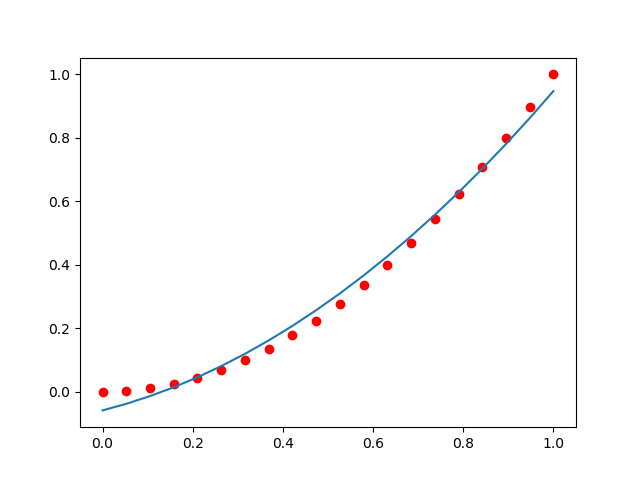

[-0.05874236869329699, 0.36039195840529137, 0.6458346659685543]
y = -0.05874236869329699 + 0.36039195840529137 * x + 0.6458346659685543 *x^2


In [18]:
X = data[['x','x^2']]
Y = data['results']
theta = Multivar_Gradient_Descent(X, Y, 0.068, 500, True)
print( 'y =', theta[0] ,'+',theta[1],'* x','+',theta[2],'*x^2' )

Now that is a perfect prediction.

Let us also analyze the efficiency in the value predicted as the no. of iterations increases.

Note that I have included the plot_on parameter in the function declaration, to give me the freedom to chose whether to plot the live graph or just get the end result.

[-0.07761363543464783, 0.45415652419068037, 0.5625078951350697]
[-0.08405581997213839, 0.48986813335721757, 0.5289402710594893]
[-0.08233828593704123, 0.4798585888297944, 0.5385654771379629]
[-0.021808569972598855, 0.12709797687020555, 0.8777819225154438]


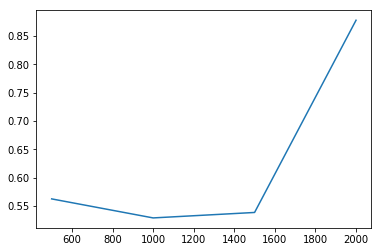

In [22]:

plt.ioff()
iterations = [500, 1000, 1500, 2000]
theta_2 = []
for i in iterations:
    theta = Multivar_Gradient_Descent(X, Y, 0.1, i, False)
    theta_2.append(theta[2])
plt.plot(iterations, theta_2)
plt.show()

So we see that as the no. of iterations increases we get the coefficient more close to 1. But also the time to compute the model increases with the increase in the no. of iterations. Hence generally there's a trade of in between those.